<a href="https://colab.research.google.com/github/CFT-EPN/actividades_club/blob/main/calculo_cientifico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad organizada por:**



[CFT-EPN](https://es-la.facebook.com/CFTepn/)

Elaborado por: Luis Palacios

#Cálculo Numérico

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Existen diferentes métodos para encontrar soluciones numéricas de una ecuación diferencial, unos mejores que otros. No existe un método general y que sea "el más óptimo". El método a aplicar dependerá del caso.

##Método de Euler

###Teoría

Supongamos que tenemos un problema de valores iniciales, de una ecuación diferencial ordinaria EDO (ODE en inglés), de la siguiente forma:

$$\dot{x} = f(x, t), \;\; x(t_{0}) = x_{0}$$

donde $x$ en principio podría ser un vector d-dimensional.

Una integración numérica consiste en aproximar la su solución de la ecuación diferencial utilizando una discretización en la variable temporal. En el caso del método de Euler, vamos aproximarla mediante una función que va de ${x}_{n}$ a ${x}_{n+1}$. 

Por definición $$ lim_{h \to 0} \dfrac{x(t+h) - x(t)}{h} = \dot{x} $$

El método de Euler consiste en aproximar la derivada por el cociente incremental: $\frac{dx}{dt} \simeq \frac{\Delta x}{\Delta t}$.

Para $h$ pequeño podemos aproximar: 

$$x_{n+1} = x_{n} + hf(x_{n}, t)$$

que es nuestra ecuación para cada de integración mediante el método de Euler.

Los valores de la variable temporal se definen como ${t}_{n+1} = {t}_{n}+h$, donde $h$ es el paso temporal que elegimos. Cuanto mas pequeño sea $h$, mas certera será la aproximación, ya que el error de truncado local es proporcional a $h^2$, $\mathcal{O}(h^2)$.

[Error local](https://en.wikipedia.org/wiki/Truncation_error_(numerical_integration)): error cometido en el cálculo de $x_{i}$ tras cada iteración.

###Práctica

Lo mas cómodo será definir una función con las ecuaciones a integrar, y otra que realice la integración:  

Resolvamos la siguiente EDO:

$$\dot{x} = a*x*\left(1-\dfrac{x}{N}\right)$$

In [ ]:
def ecuaciones(x,param):
    '''
    Recibe:
       x: Variable del sistema
       param: Lista con los parámetros del sistema
    Devuelve:
       x_dot: valor de la derivada para la variable
    '''
    
    x_dot = param[0]*x*(1.-x/param[1])

    return x_dot

In [ ]:
def integrar_ecuaciones(total_time,dt,x0,params):

    '''
    Recibe:
       total_time: Tiempo total del integración
       dt: Paso temporal (h del método)
       X0: valore inicial x0 de la integración
       params: Lista con los parámetros del sistema
    Devuelve:
       x_s: Vector con la solución (x en cada tiempo) para la variable
       num_steps: Numero de pasos de integracion
    '''

    num_steps = int(np.divide(total_time,dt))

    # Empty vectors
    xs = np.empty(num_steps)

    # Set initial values
    xs[0] = x0

    # Empty vectors
    x_dot = np.empty(num_steps)

    # Set initial derivatives values
    x_dot[0]= ecuaciones(xs[0], params)

    # Integramos con método de Euler
    for i in range(num_steps-1):
        xs[i+1] = xs[i] + dt*ecuaciones(xs[i],params)

    return xs, num_steps

In [ ]:
total_time = 50
dt = 1e-3
x0 = 1
params = [1e-1, 100]

xs, num_steps = integrar_ecuaciones(total_time, dt, x0, params)

In [ ]:
fig, ax = plt.subplots()
ax.plot(ts,xs,'-',color='red')
ax.set(title='Metodo de Euler',xlabel=r'$x$',ylabel=r'$f(x)$')
plt.show()


Se puede extender a más dimensiones...

### Ejercicio

Supongamos que tenemos una sistema de ecuación diferenciales del tipo:

$$\dot{x} = f(x,y,t)$$
$$\dot{y} = g(x,y,t)$$

Con una condición inicial dada $({x}_{0},{y}_{0})$. 

El método de Euler 2D será:

$${x}_{n+1} = {x}_{n} + h f({x}_{n},{y}_{n},t_{n})$$
$${y}_{n+1} = {y}_{n} + h g({x}_{n},{y}_{n},t_{n})$$

Reescriba las funciones de la integracion de Euler para el caso 2D y aplicarlo al siguiente sistema de ecuaciones:
$$
\dot{x} = 4x+2y
$$
$$
\dot{y} = -17x-5y
$$

**(a)** Dibuje las trayectorias en función del tiempo, $x(t)$ y $y(t)$, y el espacio de fases. 

**(b)** Dibuje el campo vector.

In [ ]:
###Obs: para comentar/descomentar presionar Control+/

# def ecuaciones(z):
#     '''
#     Recibe:
#        x, y: Variables del sistema
#        param: Lista con los parámetros del sistema
#     Devuelve:
#        x_dot, y_dot: valor de las derivadas para cada variable
#     '''

#     x = z[0]
#     y = z[1]
    
#     x_dot = 
#     y_dot = 

#     return x_dot, y_dot

In [ ]:
# def integrar_ecuaciones(total_time,dt,X0):

#     '''
#     Recibe:
#        total_time: Tiempo total del integración
#        dt: Paso temporal (h del método)
#        X0: Lista con [x0,y0] valores iniciales de la integración
#        params: Lista con los parámetros del sistema
#     Devuelve:
#        x_s, y_s: Vectores con las soluciones para ambas variables
#        num_steps: Numero de pasos de integracion
#     '''

#     num_steps = int(np.divide(total_time,dt))

#     # Empty vectors
#     xs = np.empty(num_steps)
#     ys = np.empty(num_steps)

#     # Set initial values
#     xs[0], ys[0] = X0

#     # Empty vectors
#     x_dot = np.empty(num_steps)
#     y_dot = np.empty(num_steps)

#     # Set initial derivatives values
#     x_dot[0], y_dot[0] = ecuaciones(xs[0], ys[0], params)

#     # Integramos con método de Euler
#     for i in range(num_steps-1):
#         # COMPLETAR

#     return xs, ys, num_steps

In [ ]:
# #Definimos el paso de integracion
# dt = 0.05

# #Definimos el tiempo total de integracion
# total_time = 10

# #Definimos la condicion inicial
# X0 = (1.5,0.0)

# # Integramos
# x, y, num_steps = integrar_ecuaciones(total_time,dt,X0)

# #Definimos el vector de tiempos y los vectores x, y que iremos llenando
# t = np.arange(0, total_time, step=dt)

In [ ]:
# fig, ax = plt.subplots(1,3, figsize=(16,6))

# ax[0].plot(t, x)
# ax[0].set(title='x vs. t',xlabel=r'$t$',ylabel=r'$x(t)$')

# ax[1].plot(t, y)
# ax[1].set(title='y vs. t',xlabel=r'$t$',ylabel=r'$y(t)$')

# ax[2].plot(x, y)
# ax[2].set(title='Espacio de fases',xlabel=r'$x$',ylabel=r'$y$')

Una función **muy** útil para tener una buena idea de como es el flujo es [*streamplot*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.streamplot.html#matplotlib.axes.Axes.streamplot). Lo que hace es integrar durante un tiempo corto en una grilla de puntos.

Para hacerlo andar, necesitamos calcular cuanto vale el campo vector en cada punto de la grilla. Primero nos definimos una grilla usando la función [meshgrid](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [ ]:
# # Definimos una grilla de puntos
# XX, YY = np.meshgrid(np.linspace(-2, 2, 20),np.linspace(-6, 6, 24))

# print(XX)
# print(np.shape(XX))

In [ ]:
# # Calculamos el campo vector en cada punto
# DX, DY = ecuaciones([XX, YY])

# #Y finalmente graficamos
# plt.streamplot(XX, YY, DX, DY, density=1, minlength=.1)

##Odeint

###Teoría

Supongamos que tenemos dos funciones, una muy suave con poca variación y otra que varía mucho en el tiempo, que son solución de dos sistemas de ecuaciones diferentes.

Hidden code for plots
<!-- x = np.linspace(0, np.pi, 1000)
y1 = np.sin(2*x)
y2 = (np.cos(45*x))**3*np.exp(-x**2) + np.sin(2*x)
y3 = np.sin(2*x)*np.exp(-x)

fig = plt.figure(figsize=(12, 10))
plt.plot(x, y1)
plt.plot(x[:len(x)//2-1], y[:len(x)//2-1], c='royalblue')
plt.plot(x[len(x)//2-5:], z[len(x)//2-5:], c='royalblue')
# plt.xlim(x[0]-0.5, x[-1]+0.5)
plt.show() -->

La primera función puede encontrarse con un paso de integración fijo y puede que no muy pequeño. Sin embargo, la segunda función varía mucho y puede necesitar un paso de integración más pequeño en algunos puntos temporales y más grandes en otros. Si en esta segunda función se utiliza un paso de integración muy pequeño en una parte suave de la función, entonces en cada paso de integración los valores que se obtengan serán muy similares entre sí. Por tanto, para la segunda función sería adecuado disponer de un método que ajuste automaticamente -que se adapte- el paso de integración para encontrar la solución de manera óptima. Es decir, que en las partes donde la función varía mucho tome valores "pequeños" y valores "grandes" donde la función es suave. De esta manera se obtiene un resultado cercano -una buena aproximación- a la solución real. La función odeint tarda poco tiempo en las partes de la función con comportamiento suave y algo más de tiempo en las partes con mucha variación.

Hay diversos métodos, más o menos precisos y que funcionan para diversos sistemas. Scipy trae un integrador bastante bueno llamado ["odeint"](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html) (no teman a la documentación).

El odeint necesita que le digamos como calcular la derivada en cada punto (tenemos que darle el campo vector), las condiciones iniciales y los tiempos donde queremos que integre.

Sintaxis: `solucion = odeint(campo vector, condiciones iniciales, vector de tiempos)`

Explorar la forma en la que se obtiene la solución, e.g., shape.

Odeint corre un solver llamado LSODA de la librería Odepack de
FORTRAN. Este solver adapta el método
dependendiendo de la “dificultad” del campo vector:

> LSODA, written jointly with L. R. Petzold, solves systems dy/dt = f with a
dense or banded Jacobian when the problem is stiff, but it automatically
selects between nonstiff (Adams) and stiff (BDF) methods. It uses the nonstiff
method initially, and dynamically monitors data in order to decide which
method to use.

No es tan complicado implementar odeint en FORTRAN tomando como base el código que se encuentra en el libro [Numerical Recipes in Fortran 90](http://danida.vnu.edu.vn/cpis/files/Books/NumericalRecipesinF90.pdf), pero salvo que en realidad necesiten utilizar FORTRAN, es preferible utilizar **Python** por amor y respeto, tanto al **tiempo** como a **uno mismo**.

###Práctica

* [Sistema de Lorenz](https://en.wikipedia.org/wiki/Lorenz_system)


In [ ]:
#Sistema de Lorenz
def odes_lorenz(x, t):
  sigma = 10. 
  beta = 8./3.
  rho = 28.

  x1 = x[0]
  x2 = x[1]
  x3 = x[2]

  dxdt = sigma*(x2-x1)
  dydt = x1*(rho-x3)-x2
  dzdt = x1*x2-beta*x3

  return [dxdt, dydt, dzdt]

#Condicion Inicial
x0 = [1., 1., 1.]
t = np.linspace(0, 30, 5000)

#Solucion con la funcion odeint
x = odeint(odes_lorenz, x0,  t)

In [ ]:
x = x.T

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')

ax.plot(x[0], x[1], x[2])

plt.show()

Estas son las famosas alas de la mariposa de Lorenz, las cuales están relacionadas con la teoría del caos.

**Ojo con el dt**

Atención! Para odeint, el vector de tiempos solo le dice en qué momentos queremos que devuelva el resultado de la integración. El paso temporal real lo va a ir ajustando sin avisarnos!

Para convencernos comparemos 2 integraciones con tiempos muy distintos:

In [ ]:
fig = plt.figure(figsize=(8,6))

#Graficamos la solución que teníamos de antes, con paso temporal "pequeño"
plt.plot(t, x[0])

# Hacemos otra integración con paso temporal "grande"
dt = 1
t2 = np.arange(0, 30, step=dt)
sol2 = odeint(odes_lorenz, x0, t2)
sol2 = sol2.T
plt.plot(t2, sol2[0], 'o')

plt.xlabel('t')
plt.ylabel('y')

plt.show()

Los resultados obtenidos con los dos pasos de integración iniciales son similares, pues odeint ajusta el paso de integración internamente, en el tiempo, uno con más valores y el otro con menos.

* [Ecuaciones de predador-presa](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

In [ ]:
#Lotka Volterra
def odes_Lotka_Volterra(x, t):
  alpha = 1.1 
  beta = 0.4
  delta = 0.1
  gamma = 0.4

  x1 = x[0]
  x2 = x[1]

  dxdt = alpha*x1 - beta*x1*x2
  dydt = delta*x1*x2 - gamma*x2

  return [dxdt, dydt]

#Condicion Inicial
x0 = [1., 1.]
t = np.linspace(0, 30, 5000)

#Solucion con la funcion odeint
x = odeint(odes_Lotka_Volterra, x0,  t)
x = x.T

Veamos el gráfico del espacio de fases.

In [ ]:
fig, ax = plt.subplots()

ax.plot(t, x[0], label='presa')
ax.plot(t, x[1], label='predador')

ax.set_xlabel('tiempo [arb. us.]')
ax.set_ylabel('poblacion [arb. us.]')

plt.legend(loc='best')

plt.show()

**<font color='red'> ¿Qué implica que la curva de la dinámica predador-presa sea cerrada? i.e., ¿Qué quiere decir que la curva de un sistema en el espacio de fases sea cerrada? ¿Qué implicaría que la curva no sea cerrada?</font>**

In [ ]:
  # alpha = 1.1 
  # beta = 0.4
  # delta = 0.1
  # gamma = 0.4
  # x_equilibrio = gamma/delta
  # y_equilibrio = alpha/beta

In [ ]:
fig, ax = plt.subplots()

ax.plot(x[0], x[1])
# ax.scatter(x_equilibrio, y_equilibrio)

ax.set_xlabel('presa')
ax.set_ylabel('predador')

plt.show()

###Ejercicio

Para el sistema de Lorenz graficar $x(t), y(t), z(t)$ en un arreglo vertical.

##Método de Runge-Kutta orden 4

###Observación/motivación

Hay circunstancias donde el integrador odeint puede llegar a tener problemas y, al no tener acceso al algoritmo de manera transparente (recordemos que va cambiando de método segun le convenga), es difícil lidar con ellos.

Veamos por ejemplo como se dibujan las soluciones del campo vector en este ejemplo:

In [ ]:
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pyplot as plt

# Sistema de ecuaciones
def f(t, z):
    x = z[0]
    y = z[1]
    dxdt = x-y
    dydt = x**2-4
    return [dxdt, dydt]

# Integracion odeint
dt = 0.01
tmax = 1.3
t = np.arange(0, tmax, dt)
plt.figure()
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        sol_fut = odeint(f, zi, t, tfirst=True)
        xt = sol_fut[:, 0]
        yt = sol_fut[:, 1]
        plt.plot(xt, yt)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

###Teoría

En estos casos podemos usar otra estrategia en la que fijamos el método de integración. En vez de odeint vamos a usar un método bastante estandar, llamado [Runge-Kutta 4](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods). Este método tiene sus ventajas y desventajas, y va a funcionar mejor o peor según el sistema.

Sea un problema de valores iniciales de la siguiente manera:

$$\dfrac{d y}{d t} = f(t, y), \;\; y(t_{0}) = y_{0}$$

Para $h$ pequeño se puede demostrar que $y$ se puede aproximar por:

$$y_{n+1} = y_{n} + \dfrac{h}{6}(k_{1} + 2k_{2}+ 2k_{3}+ k_{4})$$

donde 

$$t_{n+1} = t_{n} + h$$

$$k_{1} = f(y_{n}, t_{n})$$

$$k_{2} = f\left(y_{n} + \dfrac{h}{2}, t_{n} + \dfrac{k_{1}}{2}\right)$$

$$k_{3} = f\left(y_{n} + \dfrac{h}{2}, t_{n} \dfrac{k_{2}}{2}\right)$$

$$k_{4} = f(y_{n} + h, t_{n} + hk_{3})$$

con un error local de $\mathcal{O}(h^5)$. 



Lo bueno de este método es que pueden escribirlo ustedes mismos y no hay nada de caja negra! Para simplificar les vamos a proporcionar una versión que se adapta bastante bien si vienen de odeint.

In [ ]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

Esta función ejecuta la integración de un paso temporal. Los argumentos que requiere son: i) campo vector (**función**) ii) valor de las variables en el tiempo t, iii) paso temporal

Los últimos dos (*args, **kwargs) son para que, en caso de que sus campos vectores tengan argumentos, se los puedan pasar a la función y los sepa manejar (más, adelante).

La forma de utilizarlo en 2D sería:

`x[i+1], y[i+1] = rk4(campo_vector, [x[i], y[i]], t, dt)`

###Práctica

La ecuación diferencial que gobierna el decaimiento radioactivo del número de núcleos de la especie (1) es: 

$$\dfrac{dN_{1}}{dt} = -k_{1}N_{1}$$

Si tenemos sólo dos especies en esta cadena de decaimiento, la especie (2) se producirá a la misma rapidez que la actividad de los núcleos de la primera especie. El decaimiento de la segunda especie está dado por:

$$\dfrac{dN_{2}}{dt} = -\dfrac{dN_{1}}{dt} -k_{2}N_{2}$$

A través del método de Runge-Kutta 4 investiga los valores de $k_{1}$ y $k_{2}$, y grafica $N_{1}(t)$ y $N_{2}(t)$.


**Obs:** Hay una nueva función en scipy llamada [`solve_ivp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)
cuyo objetivo es, eventualmente, reemplazar a `odeint`. En esta
función se puede elegir el solver entre una lista de algoritmos
disponibles (entre los que esta `odeint` y `runge-kutta`).

#Cálculo Simbólico

***¿Por qué el Cálculo Simbólico?***

## Wolfram **Mathematica** y Wolfram Alpha

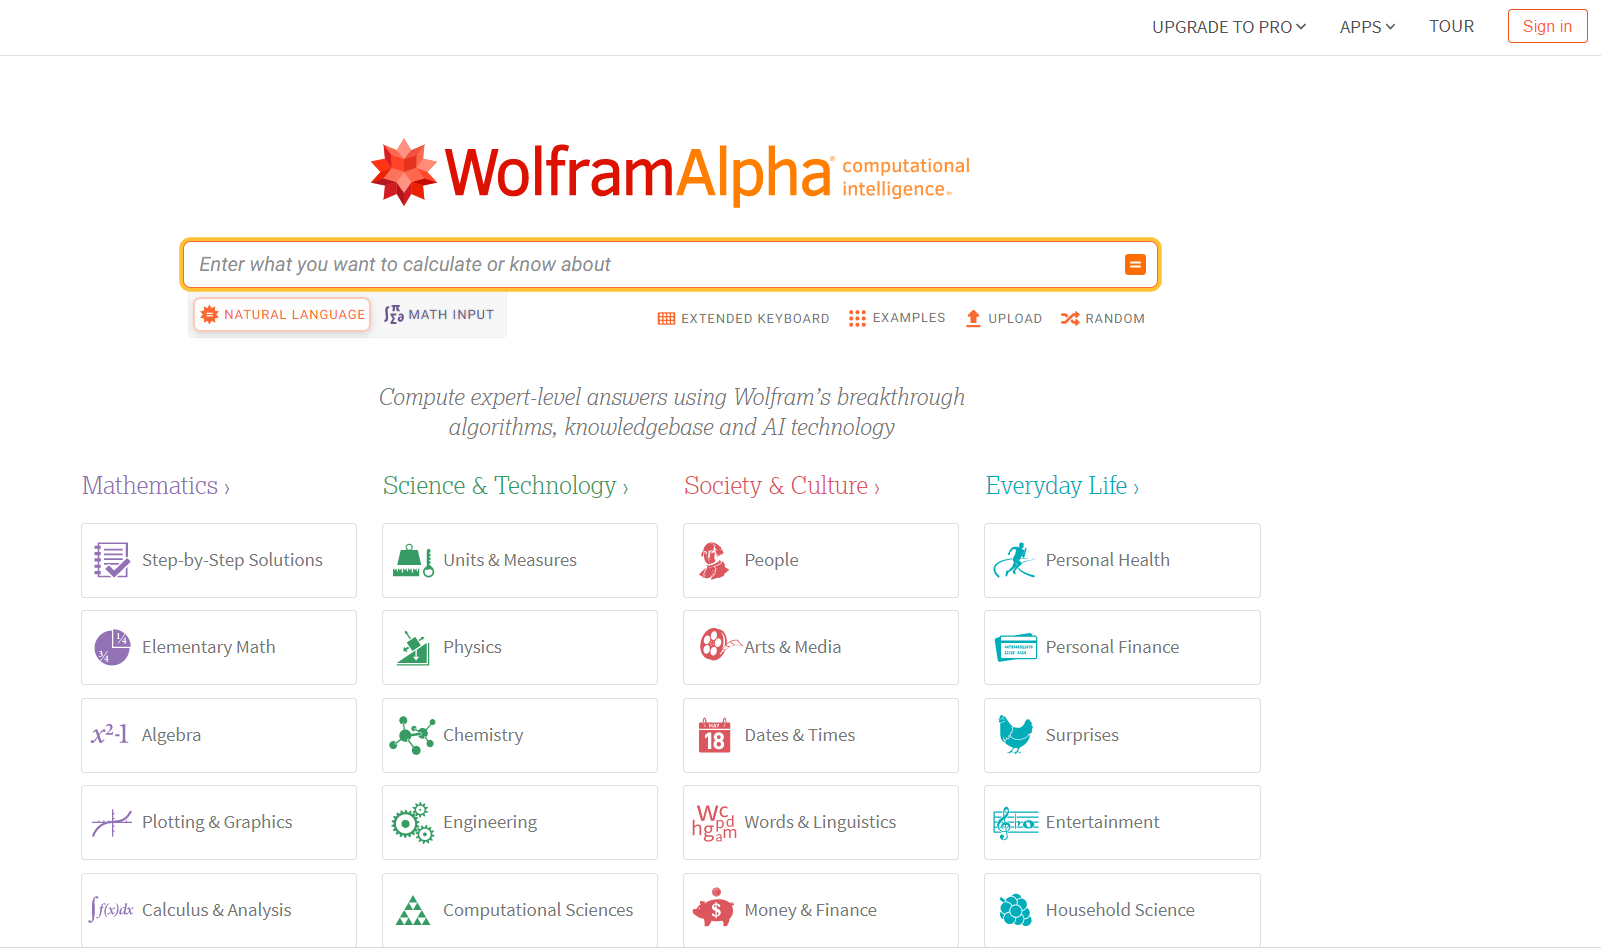

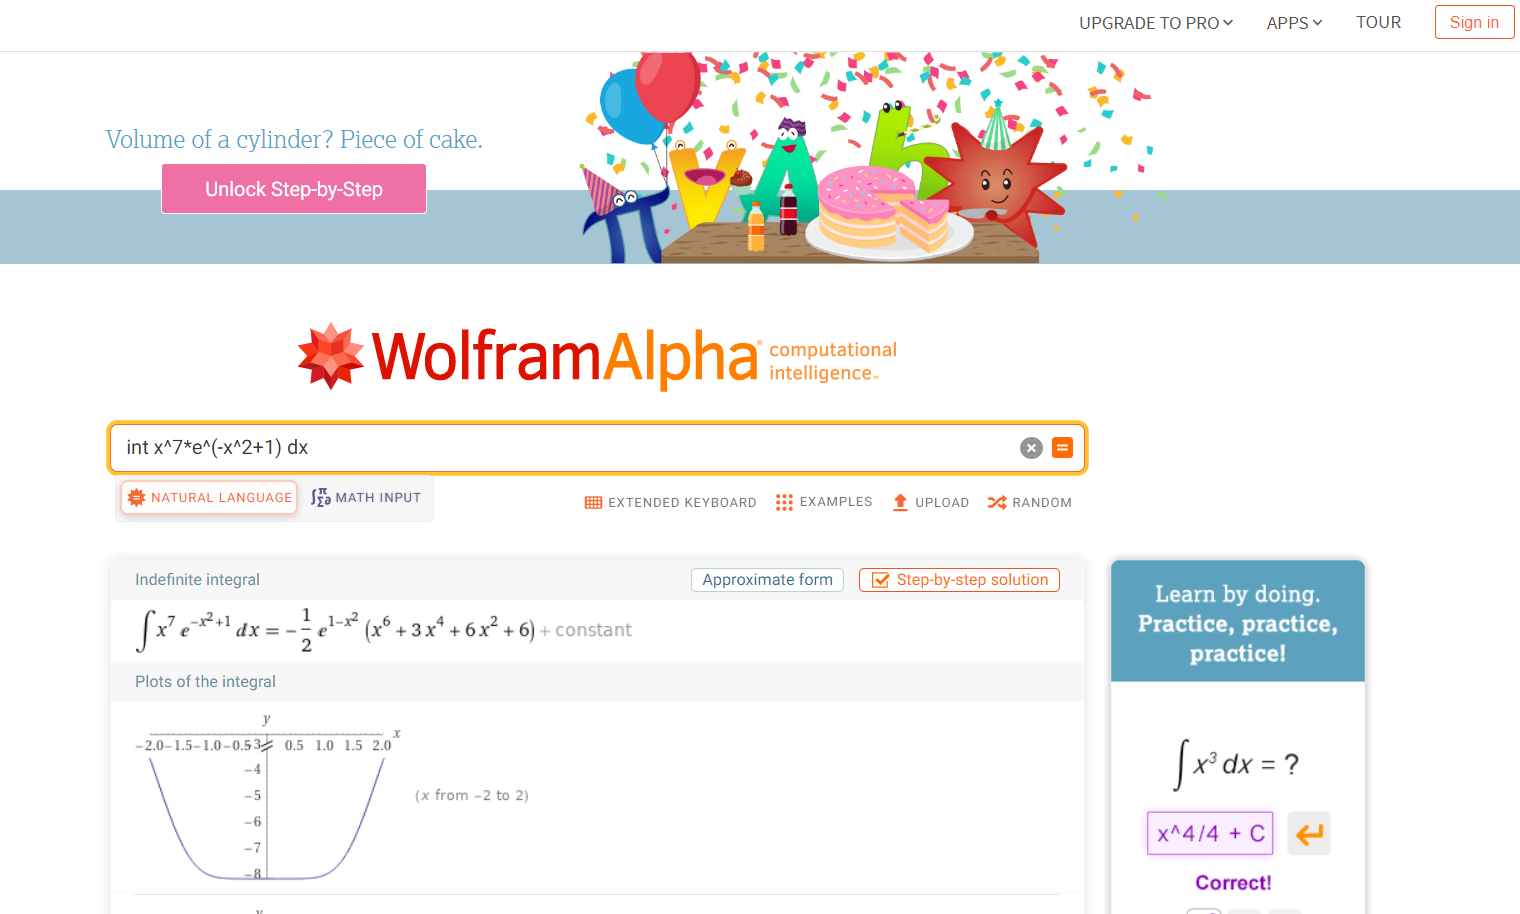

Y mucho más...

**PERO** es pagado. A **largo plazo** no conviene...



## **SymPy**

### **¿A qué nos referimos con "Cálculo Simbólico"?**


Tambien llamado "Computación Simbólica", es una área que se encargar de resolver ecuaciones usando **objetos matemáticos**. Dicho de otro modo, es el método por el cual se obtiene una solución exacta a una expresion matemática usando expresiones simbólicas (variables, funciones, polinomios, matrices, etc.) Por ejemplo, si nos proponen calcular una integral definida de alguna función $f(x)$ , lo primero que hacemos es buscar su primitiva $F(x)$ para luego evaluar los límites de integración, habiendo obtenido de esta manera una solución **exacta** al problema. Por otro lado, podríamos calcular dicha integral mediante procesos iterativos como el método del trapecio obteniendo un resultado **aproximado** que va acorde con la presicion de nuestro método, lo que equivale a un cálculo numérico.

Otro ejemplo, tomado del [tutorial de SymPy](https://docs.sympy.org/latest/tutorial/intro.html) , es el cálculo de la raiz cuadrada. Usando la libreria `math` de python podemos obtener el resultado directo de nuestra operación.

In [ ]:
import math
math.sqrt(9)

9 es un cuadrado perfecto, así que obtuvimos la respuesta exacta, 3.

In [ ]:
math.sqrt(8)

In [ ]:
math.cos(5)

Aquí tenemos un resultado aproximado. 2,82842712475 no es la raíz cuadrada exacta de 8 (de hecho, la raíz cuadrada real de 8 no se puede representar con un decimal finito, ya que es un número irracional). Si todo lo que nos importara fuera la forma decimal de la raíz cuadrada de 8, estaríamos listos.

**SymPy:** Symbolic Python (Python Simbólico)

<img src='https://www.sympy.org/static/images/logo.png' width='200'>

In [ ]:
import sympy as smp

In [ ]:
smp.sqrt(8)

Ahora tenemos la solución exacta de la raíz cuadrada.

### **Introducción**

Los símbolos se definen de la siguiente manera:

In [ ]:
x = smp.symbols('x')

Veamos el tipo de objeto que es la variable `x`.


In [ ]:
type(x)

Sobre las variables simbólicas definidas se pueden realizar diferentes tipos de operaciones.

In [ ]:
x**2

In [ ]:
#hay que tener presente que se debe utilizar los operadores matemáticos de las librerías que soportan los diferentes tipos de variables 
smp.sin(x) + smp.cos(x)

En las diferentes librerías de Python hay muchas funciones implementadas, lo cual también es cierto en Sympy y se pueden revisar en su [documentación](https://docs.sympy.org/latest/modules/functions/index.html).

A más de realizar operaciones sobre las variables numéricas también se pueden guardar expresiones generadas con nuestras variables, y luego realizar otras operaciones.

In [ ]:
z1 = smp.exp(-x) + (x+1)**3
z1

In [ ]:
z2 = smp.cos(x) + smp.exp(x)
z2

In [ ]:
z3 = z1 + z2
z3

Las variables que guardan expresiones no son variables simbólicas (como es claro) y son muy útiles para simplificar largas expresiones en pequeñas partes que pueden ser puestas juntas para realizar la operación de interés.

In [ ]:
type(z3)

Como las expresiones también son objetos de sympy entonces se pueden aplicar diversas funciones sobre ellas.

In [ ]:
#la función symplify() permite encontrar una representación compacta de nuestra expresión
z3.simplify()

Y operaciones sobre estas nuevas 'variables' de Python.

In [ ]:
z4 = smp.cos(z3)
z4

Otros ejemplos:

In [ ]:
z5 = x**3 + 6*x**2 + 11*x + 6
z5

In [ ]:
z5.factor()

In [ ]:
z6 = smp.cos(x)**2 + smp.sin(x)**2
z6

In [ ]:
z6.simplify()-1

In [ ]:
((x-1)*(x+3)*(x+7)*x).expand()

En la notación `smp.solve(f,x)`, sympy encuentra el valor de $x$ que hace $f(x) = 0$.

In [ ]:
f = ((x-12)*(x+13)).expand()
f

In [ ]:
smp.solve(f, x)

In [ ]:
smp.solve(smp.tanh(x), x)

**Buena Práctica**: Si se sabe que la variable $x$ es real (y en algunos casos positiva) es una buena práctica especificar esto cuando se definen las variables para prevenir problemas complicados cuando se resuelven problemas complicados.

In [ ]:
x = smp.symbols('x')
smp.solve(x**2+1, x)

In [ ]:
x = smp.symbols('x', real=True, positive=True)
smp.solve(x+4, x)

Se pueden definir varios tipos de variables de una vez.


In [ ]:
x, y, z = smp.symbols('x y z')
F = x**2+smp.sin(z)*y
F

Se pueden resolver expresiones de varias variables para especificar el tipo de variable respecto del cual se busca la solución. 

In [ ]:
#respecto de x
x_sols = smp.solve(F, x)
x_sols

In [ ]:
x_sols[0]

In [ ]:
x_sols[1]

In [ ]:
#respecto de y
y_sols = smp.solve(F,y)
y_sols

In [ ]:
#respecto de z
z_sols = smp.solve(F,z)
z_sols

Para expresiones de varias variables se puede sustituir valores dentro de estas variables.

In [ ]:
F

In [ ]:
F.subs([(y,smp.cos(z)),(z,y)])

### **Ejemplo**

Un objeto que cae se encuentra hacia una plataforma en movimiento que acelera hacia arriba se describe mediante:

1. Objeto: $h_o(t) = h_0 - v_o t - \frac{1}{2}gt^2$
2. Plataforma: $h_p(t) = v_p t + \frac{1}{2}qt^2$

**Encuentra la velocidad inicial $v_0$ tal que cuando el objeto y la plataforma chocan, se mueven a la misma velocidad.**

Necesitamos resolver para $v_0$ y $t$ en dos ecuaciones

1. $h_0(t) = h_p(t)$
2. $ \frac{dh_0}{dt} (t) = - \frac{dh_p}{dt}(t) $

En sympy, necesitamos construir nuestro sistema de ecuaciones como 

> $EC_1=0$, $EC_2=0$, ... 

En nuestro caso, las reescribimos como

1. $h_0(t) - h_p(t) = 0$
2. $\frac{dh_0}{dt} + \frac{dh_p}{dt} = 0$

In [ ]:
#definimos las variables
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

In [ ]:
#definimos las expresiones del movimiento
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
dh0dt = g*t - v0
hpt = vp*t + smp.Rational(1,2)*q*t**2
dhpdt = vp + q*t

In [ ]:
#definimos el sistema de ecuaciones
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

In [ ]:
#resolvemos las ecuaciones
smp.solve([eq1, eq2], [t, v0])[0]

In [ ]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [ ]:
v_initfall

In [ ]:
t_collide

**¿Cuál es la velocidad cuando ellos colisionan?**


In [ ]:
dh0dt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

In [ ]:
dhpdt.subs([(t,t_collide),(v0,v_initfall)]).simplify()

### **Cálculo**

In [ ]:
x = smp.symbols('x')

**Límites**
$$\lim_{x \to \pi} \sin(x/2+ \sin(x))$$

In [ ]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi)

**Derivadas** 

$$ \frac{d}{dx} \left( \frac{1+\sin x}{1 - \cos x} \right)^2 $$

In [ ]:
(smp.diff(((1 + smp.sin(x)) / (1 - smp.cos(x)))**2, x)).simplify()

*Regla de la cadena*

$$\frac{d}{dx} f(x+g(x)) $$

In [ ]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [ ]:
f

In [ ]:
dfdx = smp.diff(f,x)
dfdx

In [ ]:
dfdx.subs([(g, smp.sin(x))]).doit()

**Integrales**

$$ \int \csc(x) \cot (x)  dx $$

In [ ]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

**Integrales definidas**

$$\int_{0}^{\ln(4)}\frac{e^x}{\sqrt{e^{2x}+9}} dx $$

In [ ]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

In [ ]:
t= smp.symbols('t')

In [ ]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

$$ \int x^7 e^{-x^2+1} dx$$

In [ ]:
smp.integrate(x**7*smp.exp(-x**2+1), x).simplify()

**Cálculo Vectorial**

In [ ]:
x, y, z, u1, u2, u3, v1, v2, v3, t = smp.symbols('x y z u_1 u_2 u_3 v_1 v_2 v_3 t')

Vectores y geometría

In [ ]:
u = smp.Matrix([u1,u2,u3])
v = smp.Matrix([v1,v2,v3])

In [ ]:
#Suma y producto
2*u+v

In [ ]:
#Producto punto
u.dot(v)

In [ ]:
#Producto cruz
u.cross(v)

In [ ]:
#Norma
u.norm()

Proyecciones

$\text{proj}_v(u) = \frac{u \cdot v}{|v|^2} v$

In [ ]:
proj_v_u = u.dot(v)/v.norm()**2 * v
proj_v_u

Líneas: 

$\vec{r}(t) = \vec{r}_0 + \vec{v} t$


In [ ]:
r0 = smp.Matrix([1,1,1])
v = smp.Matrix([1,3,-1])
r = r0 + t*v
r

In [ ]:
r = smp.Matrix([3*t, smp.sin(t), t**2])
r

In [ ]:
smp.diff(r,t)

Ángulo entre vectores: velocidad y aceleración

$$\vec{a}\cdot \vec{b} = |\vec{a}| |\vec{b}| \cos(\theta)$$


In [ ]:
v = smp.diff(r,t)
a = smp.diff(v,t)
theta = smp.acos(v.dot(a)/(v.norm()*a.norm())).simplify()
theta

Evaluación del ángulo a $t = 6$.

In [ ]:
theta.subs(t,6).evalf()

Integrales de vectores

In [ ]:
r = smp.Matrix([smp.exp(t)*smp.cos(t), t**4, 1/(1+t**2)])
r

In [ ]:
smp.Integral(r,t).doit()

**Derivadas Parciales**

In [ ]:
x, y, z = smp.symbols('x y z')

Encontremos las derivadas parciales $\partial f / \partial x$ y $\partial f / \partial y$ de $f(x,y)=y^2\sin(x+y)$

In [ ]:
f = y**2 * smp.sin(x+y)
smp.diff(f,x)

In [ ]:
smp.diff(f,y)

O algo más complicado como

$$\frac{\partial^3 f}{\partial xy^2}$$

In [ ]:
smp.diff(f,y,y,x)

**Integrales Múltiples**

En algunos casos se pueden realizar analíticamente

$$\int_0^1 \int_0^{1-x^2} \int_3^{4-x^2-y^2} x \; dzdydx $$

In [ ]:
x, y, z = smp.symbols('x, y, z')
f = x
smp.integrate(f, (z, 3, 4-x**2-y**2), (y, 0, 1-x**2), (x, 0, 1))

# **Referencias: Canales de YouTube**
* [Mr. P Solver](https://www.youtube.com/c/MrPSolver/playlists)
* Física Exactas UBA: [Sistemas Dinámicos e Inteligencia Artificial](https://www.youtube.com/watch?v=wHw1LR62uN0&list=PLNbPNPgqTfs59fZc7fjetWtJJ5XUZzZlX&index=2&ab_channel=F%C3%ADsicaExactasUBA)